# Potato Disease Classification
Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

## Data Collection

### Three options of collecting data:
- We can use read-made data, we can either buy it from third party vendor or get it from kaggle etc.

- We can have a team of data annotators whose job is to collect these images from farmers and annotate those images either  as a healthy potato leave or having a early or late blight disease.

- Data scientistes can write web scraping scripts to go through different websites which has potato images and collect those images and then use the tool like docano to annotate the data or we can get annotated images by using those web scraping tools.


##### Here we are going to use data set from kaggle.

### Import all the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Set all the Constants

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

### Import data into tensorflow dataset object
We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(directory="/content/drive/MyDrive/Potato-Disease-Classification/PlantVillage", shuffle=True, image_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

Length of dataset is 68 means we have total 68 batch with size = 32

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())


(32, 256, 256, 3)
[1 0 0 1 1 1 1 2 0 1 0 1 1 0 0 0 0 1 2 0 1 0 0 0 1 0 2 1 1 0 1 0]


In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[167. 162. 168.]
  [174. 169. 175.]
  [183. 178. 184.]
  ...
  [167. 161. 165.]
  [177. 171. 175.]
  [147. 141. 145.]]

 [[168. 163. 169.]
  [173. 168. 174.]
  [178. 173. 179.]
  ...
  [151. 145. 149.]
  [150. 144. 148.]
  [156. 150. 154.]]

 [[169. 164. 170.]
  [173. 168. 174.]
  [177. 172. 178.]
  ...
  [144. 138. 142.]
  [149. 143. 147.]
  [180. 174. 178.]]

 ...

 [[152. 146. 150.]
  [143. 137. 141.]
  [146. 140. 144.]
  ...
  [121. 110. 114.]
  [127. 116. 120.]
  [135. 124. 128.]]

 [[139. 133. 137.]
  [133. 127. 131.]
  [144. 138. 142.]
  ...
  [118. 107. 111.]
  [116. 105. 109.]
  [119. 108. 112.]]

 [[159. 153. 157.]
  [140. 134. 138.]
  [137. 131. 135.]
  ...
  [115. 104. 108.]
  [125. 114. 118.]
  [138. 127. 131.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].numpy())

[[[144. 133. 137.]
  [127. 116. 120.]
  [143. 132. 136.]
  ...
  [156. 148. 146.]
  [159. 151. 149.]
  [162. 154. 152.]]

 [[110.  99. 103.]
  [ 67.  56.  60.]
  [ 93.  82.  86.]
  ...
  [155. 147. 145.]
  [153. 145. 143.]
  [152. 144. 142.]]

 [[212. 201. 205.]
  [130. 119. 123.]
  [112. 101. 105.]
  ...
  [165. 157. 155.]
  [163. 155. 153.]
  [161. 153. 151.]]

 ...

 [[ 94.  89.  96.]
  [116. 111. 118.]
  [117. 112. 119.]
  ...
  [162. 159. 166.]
  [167. 164. 171.]
  [171. 168. 175.]]

 [[111. 106. 113.]
  [110. 105. 112.]
  [ 92.  87.  94.]
  ...
  [155. 152. 159.]
  [158. 155. 162.]
  [160. 157. 164.]]

 [[136. 131. 138.]
  [ 90.  85.  92.]
  [118. 113. 120.]
  ...
  [169. 166. 173.]
  [171. 168. 175.]
  [172. 169. 176.]]]


### Visualize some of the images from our dataset

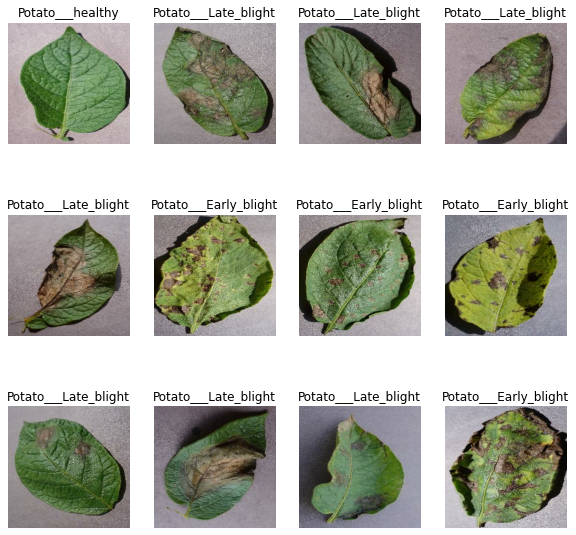

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

### Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

- Training: Dataset to be used while training
- Validation: Dataset to be tested against while training
- Test: Dataset to be tested against after we trained a model

In [ ]:
len(dataset)

NameError: ignored

In [ ]:
EPOCHS = 50

In [ ]:
#80% ==> training
#20% ==> 10% validation, 10% test

In [ ]:
train_size = 0.8
len(dataset)*train_size

NameError: ignored

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

In [ ]:
val_size = 0.1
len(dataset)*val_size

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle = True, shuffle_size = 10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

In [ ]:
len(val_ds)

In [ ]:
len(test_ds)

### Cache, Shuffle, and Prefetch the Dataset

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Preprocessing & Model Building

### Building the Model
#### Creating a Layer for Resizing and Normalization

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

why do we need to resize (256,256) image to again (256,256). we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it.

In [ ]:
resize_and_rescale = tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
      layers.experimental.preprocessing.Rescaling(1.0/255)                   
])

### Data Augmentation

Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [ ]:
data_augmentation = tf.keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2)                                    

])

### Applying Data Augmentation to Train Dataset

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

### Model Architecture

We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks.

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

### Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 199s 213ms/step - loss: 0.9024 - accuracy: 0.4896 - val_loss: 0.8648 - val_accuracy: 0.4010
Epoch 2/50
54/54 [==============================] - 6s 111ms/step - loss: 0.5833 - accuracy: 0.7263 - val_loss: 0.3391 - val_accuracy: 0.8802
Epoch 3/50
54/54 [==============================] - 6s 111ms/step - loss: 0.3424 - accuracy: 0.8536 - val_loss: 0.1477 - val_accuracy: 0.9323
Epoch 4/50
54/54 [==============================] - 6s 110ms/step - loss: 0.2217 - accuracy: 0.9103 - val_loss: 0.1210 - val_accuracy: 0.9635
Epoch 5/50
54/54 [==============================] - 6s 111ms/step - loss: 0.2031 - accuracy: 0.9259 - val_loss: 0.0774 - val_accuracy: 0.9688
Epoch 6/50
54/54 [==============================] - 6s 111ms/step - loss: 0.1723 - accuracy: 0.9346 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 7/50
54/54 [==============================] - 6s 112ms/step - loss: 0.1102 - accuracy: 0.9630 - val_loss: 0.0434 - val_accuracy: 0.9844
Epoc

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 48ms/step - loss: 0.0111 - accuracy: 0.9961


##### We can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [ ]:
scores

[0.011050526984035969, 0.99609375]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history["accuracy"]

[0.4895833432674408,
 0.7262731194496155,
 0.8535879850387573,
 0.9103009104728699,
 0.9259259104728699,
 0.9346064925193787,
 0.9629629850387573,
 0.9762731194496155,
 0.9635416865348816,
 0.9560185074806213,
 0.9826388955116272,
 0.9901620149612427,
 0.9699074029922485,
 0.9878472089767456,
 0.9930555820465088,
 0.9930555820465088,
 0.9953703880310059,
 0.9826388955116272,
 0.9762731194496155,
 0.9976851940155029,
 0.9988425970077515,
 0.9826388955116272,
 0.9878472089767456,
 0.9953703880310059,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]

loss = history.history['loss']
val_loss = history.history['val_loss']

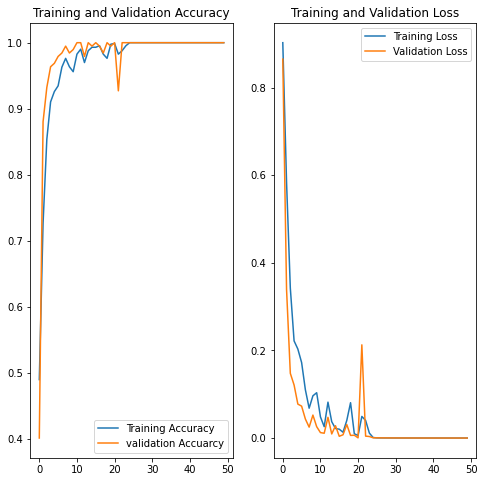

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label= 'validation Accuarcy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

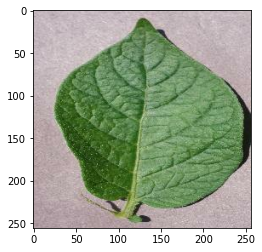

In [ ]:
for images_batch, label_batch in test_ds.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


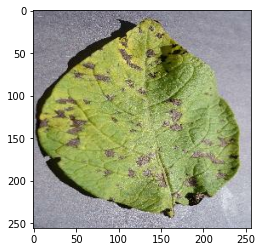

In [ ]:
import numpy as np

for images_batch, label_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])

### Write a function for inference

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)  #craete a batch 

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

### Now run inference on few sample images

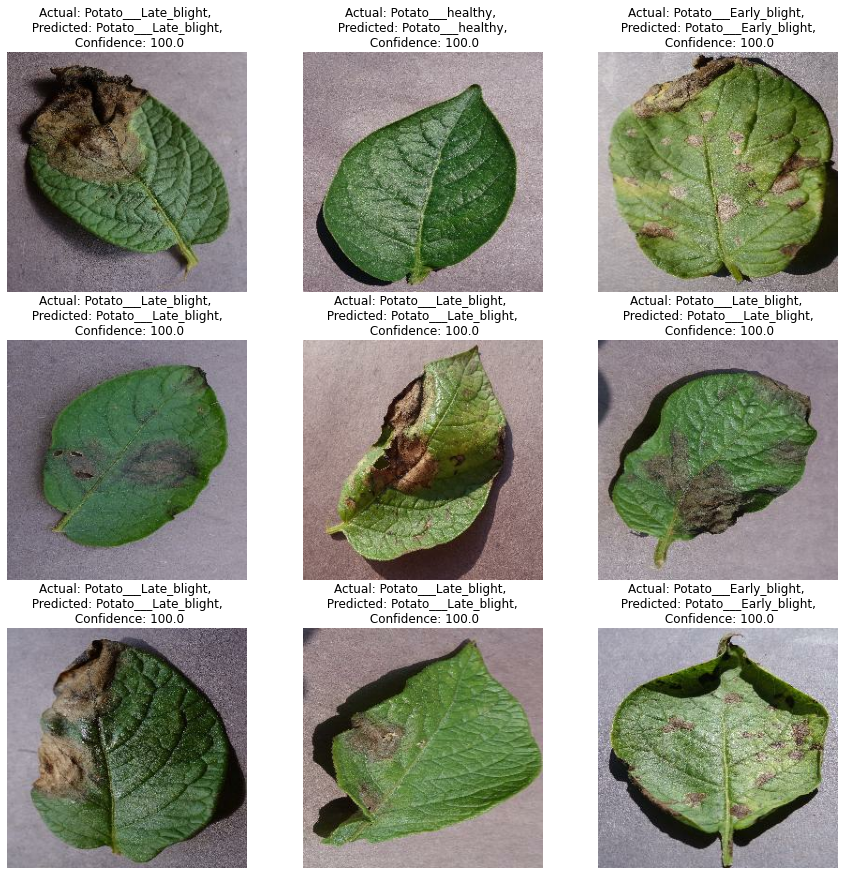

In [ ]:
plt.figure(figsize=(15,15))

for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")


    plt.axis("off")

### Saving the Model
We append the model to the list of models as a new version

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("..//content/drive/MyDrive/Potato-Disease-Classification/models") + [0]])+1
model.save(f"..//content/drive/MyDrive/Potato-Disease-Classification/models/{model_version}")

INFO:tensorflow:Assets written to: ..//content/drive/MyDrive/Potato-Disease-Classification/models/2/assets


In [ ]:
model.save("../potatoes.h5")